In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [3]:
df[['height', 'weight']].corr()

,height,weight
height,1.00000,0.69311
weight,0.69311,1.00000


In [4]:
df[['height', 'weight', 'age']].corr()

,height,weight,age
height,1.000000,0.693110,-0.077538
weight,0.693110,1.000000,0.067994
age,-0.077538,0.067994,1.000000


In [6]:
df['age'].describe()

count    6292.000000
mean       27.280556
std         4.276149
min        17.642710
25%        24.136893
50%        27.013005
75%        30.123888
max        43.206023
Name: age, dtype: float64

**Пример 2**

In [7]:
df[['height', 'weight', 'bmi']].corr()

,height,weight,bmi
height,1.000000,0.693110,-0.065423
weight,0.693110,1.000000,0.672573
bmi,-0.065423,0.672573,1.000000


In [8]:
df.describe()

,year,no,height,weight,age,cohort,bmi
count,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000,6292.000000
mean,2008.556421,29.645105,183.811507,87.621662,27.280556,1981.154800,25.917179
std,4.593766,23.474342,5.383858,6.963876,4.276149,6.314963,1.478541
min,2001.000000,1.000000,165.000000,65.000000,17.642710,1963.000000,19.460881
25%,2005.000000,12.000000,180.000000,83.000000,24.136893,1976.000000,24.967113
50%,2009.000000,24.000000,183.000000,87.000000,27.013005,1981.000000,25.925926
75%,2013.000000,39.000000,188.000000,92.000000,30.123888,1986.000000,26.874496
max,2016.000000,98.000000,205.000000,117.000000,43.206023,1998.000000,30.930438


**Пример 3**

In [10]:
X = df['height']
Y = df['weight']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

25.98645551425497

In [14]:
import numpy as np

In [15]:
np.cov(X, Y)

array([[28.98592385, 25.98645551],
       [25.98645551, 48.49556786]])

In [16]:
X.var(ddof=1), Y.var(ddof=1)

(28.985923846242812, 48.49556786059397)

In [17]:
np.cov(X * 10, Y)

array([[2898.59238462,  259.86455514],
       [ 259.86455514,   48.49556786]])

**Пример 4**

In [19]:
corr = cov / (X.std() * Y.std(ddof = 1))
corr

0.6931104534750656

In [21]:
df[['height', 'weight']].corr()

,height,weight
height,1.00000,0.69311
weight,0.69311,1.00000


In [22]:
np.corrcoef(X, Y)

array([[1.        , 0.69311045],
       [0.69311045, 1.        ]])

**Пример 5**

In [25]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

[2.12260755 0.90522001 0.19307682 0.45230071 0.98146616 0.5132698
 0.49813099 1.94037441 0.40508621 0.40247483]


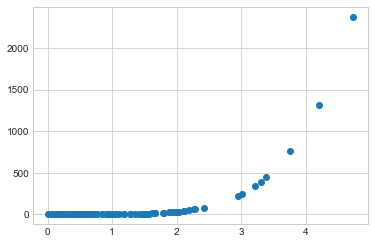

In [26]:
x = np.random.exponential(size=100)
y = x ** 5

plt.scatter(x, y)
print(x[:10])

In [27]:
np.corrcoef(x, y)

array([[1.        , 0.68065769],
       [0.68065769, 1.        ]])

In [37]:
def is_concordant(pair1, pair2):
    """
    Являются ли две пары согласованными
    """
    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

In [29]:
from itertools import combinations

In [30]:
list(combinations(range(6), r=2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [31]:
list(zip(x, y))[:10]

[(2.1226075492135905, 43.08722479210103),
 (0.9052200057454184, 0.6078140255867976),
 (0.1930768226137062, 0.00026831856091311085),
 (0.45230071286632395, 0.018929378760192066),
 (0.9814661583004658, 0.910702747813759),
 (0.5132697981300655, 0.03562284088752467),
 (0.4981309892100228, 0.030670284338204314),
 (1.940374408684947, 27.506015964934484),
 (0.40508621058337785, 0.010907803325594786),
 (0.4024748330110088, 0.010560722824090351)]

In [38]:
P = 0
Q = 0
i = 0

for pair1, pair2 in combinations(zip(x, y), r=2):
    if i < 10:
        print(pair1, pair2)
        i += 1
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1
        
P, Q

(2.1226075492135905, 43.08722479210103) (0.9052200057454184, 0.6078140255867976)
(2.1226075492135905, 43.08722479210103) (0.1930768226137062, 0.00026831856091311085)
(2.1226075492135905, 43.08722479210103) (0.45230071286632395, 0.018929378760192066)
(2.1226075492135905, 43.08722479210103) (0.9814661583004658, 0.910702747813759)
(2.1226075492135905, 43.08722479210103) (0.5132697981300655, 0.03562284088752467)
(2.1226075492135905, 43.08722479210103) (0.4981309892100228, 0.030670284338204314)
(2.1226075492135905, 43.08722479210103) (1.940374408684947, 27.506015964934484)
(2.1226075492135905, 43.08722479210103) (0.40508621058337785, 0.010907803325594786)
(2.1226075492135905, 43.08722479210103) (0.4024748330110088, 0.010560722824090351)
(2.1226075492135905, 43.08722479210103) (1.1835510287901532, 2.322388842580876)


(4950, 0)

In [40]:
tau = (P - Q) / (P + Q)
tau

1.0

In [41]:
pd.DataFrame({'x': x, 'y': y}).corr(method='kendall')

,x,y
x,1.0,1.0
y,1.0,1.0


In [42]:
pd.DataFrame({'x': x, 'y': y}).corr(method='spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


In [55]:
from scipy import stats

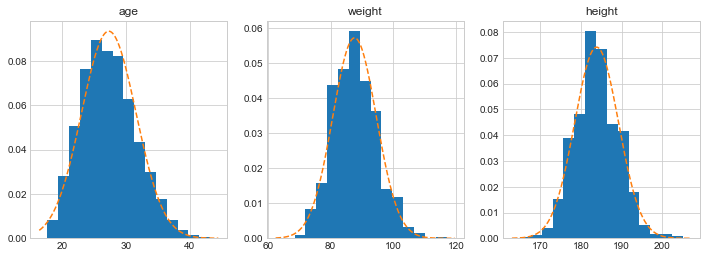

In [74]:
keys = ['age', 'weight', 'height']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=15)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

**Пример 7**

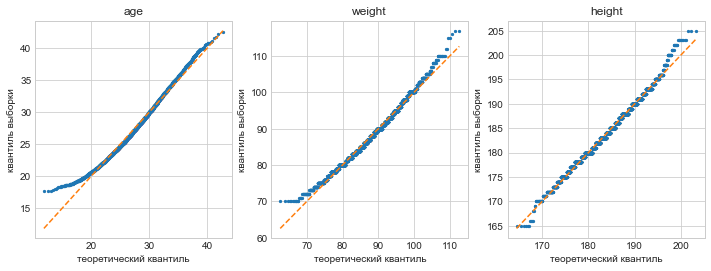

In [79]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретический квантиль')
    ax.set_ylabel('квантиль выборки')

In [80]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


**Пример 8**

In [81]:
# +-1сигма = 0,68
# +-2сигмы = 0,95
# +-3сигмы = 0,997

In [86]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6711697393515575
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9632867132867133
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9977749523204069
weight
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.671646535282899
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9588366179275271
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9958677685950413
height
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.687857596948506
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.951048951048951
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9915766052129689


In [96]:
alpha = 0.05

loc = 3
scale = 2
sample = np.random.normal(loc, scale, size=10000)

stats.normaltest(sample)
#H0 - распределение нормально

AttributeError: 'numpy.float64' object has no attribute 'normaltest'